<a href="https://colab.research.google.com/github/amulyakamatagi/python-moments-of-business/blob/main/Normal_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROBLEM STATEMENT:

>  Calculate the risk and return of ICICI bank and HDFC bank

> Calculate the gains and draw the necessary inferences

> also calulate the interval estimates

In [38]:
# importing all libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
# loading the dataset
#

In [41]:
data_1=pd.read_csv('HDFC.bank.csv')
data_1

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,28-April-2023,1682.60,1690.95,1670.00,1688.05,1680.234839,268231,9571,4.506911e+08,180157.0,67.16,20.95,5.45
1,27-April-2023,1672.20,1685.45,1666.05,1681.05,1673.700007,203628,8003,3.408122e+08,102685.0,50.43,19.40,8.85
2,26-April-2023,1660.20,1674.40,1654.85,1672.20,1668.084653,100304,3481,1.673156e+08,54009.0,53.85,19.55,12.00
3,25-April-2023,1689.00,1689.00,1661.10,1663.60,1667.143813,423231,8612,7.055869e+08,319663.0,75.53,27.90,-25.40
4,24-April-2023,1675.20,1691.50,1674.55,1688.45,1680.593322,137775,5221,2.315437e+08,71815.0,52.12,16.95,13.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5-April-2019,2295.00,2311.00,2282.40,2301.75,2293.293443,65062,3923,1.492063e+08,26728.0,41.08,28.60,6.75
1006,4-April-2019,2295.00,2311.05,2280.05,2284.30,2297.280273,66428,2809,1.526037e+08,29548.0,44.48,31.00,-10.70
1007,3-April-2019,2295.00,2315.45,2290.00,2295.25,2306.306284,52200,2030,1.203892e+08,13888.0,26.61,25.45,0.25
1008,2-April-2019,2315.15,2316.60,2285.75,2296.50,2296.458975,69592,2186,1.598152e+08,35996.0,51.72,30.85,-18.65


In [42]:
data_1=data_1[['Date','Close Price']]
data_1

,Date,Close Price
0,28-April-2023,1688.05
1,27-April-2023,1681.05
2,26-April-2023,1672.20
3,25-April-2023,1663.60
4,24-April-2023,1688.45
...,...,...
1005,5-April-2019,2301.75
1006,4-April-2019,2284.30
1007,3-April-2019,2295.25
1008,2-April-2019,2296.50


In [43]:
hdfc=data_1.rename(columns={'Close Price':'closing_price'})
hdfc

,Date,closing_price
0,28-April-2023,1688.05
1,27-April-2023,1681.05
2,26-April-2023,1672.20
3,25-April-2023,1663.60
4,24-April-2023,1688.45
...,...,...
1005,5-April-2019,2301.75
1006,4-April-2019,2284.30
1007,3-April-2019,2295.25
1008,2-April-2019,2296.50


In [44]:
# setting the date as index

In [45]:
HDFC=hdfc.set_index(pd.DatetimeIndex(hdfc['Date']))
HDFC

,Date,closing_price
Date,,
2023-04-28,28-April-2023,1688.05
2023-04-27,27-April-2023,1681.05
2023-04-26,26-April-2023,1672.20
2023-04-25,25-April-2023,1663.60
2023-04-24,24-April-2023,1688.45
...,...,...
2019-04-05,5-April-2019,2301.75
2019-04-04,4-April-2019,2284.30
2019-04-03,3-April-2019,2295.25


In [46]:
# plotting the dataset

Text(0, 0.5, 'Closing_price')

<Figure size 800x500 with 0 Axes>

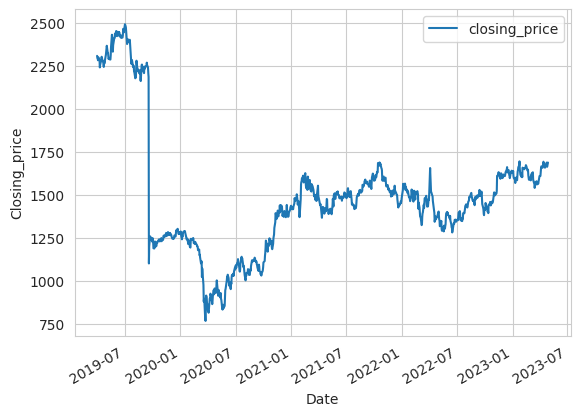

In [47]:
sns.set_style(style='whitegrid')
figure=plt.figure(figsize=(8,5))
HDFC.plot(kind='line')
plt.ylabel('Closing_price')

<Figure size 900x900 with 0 Axes>

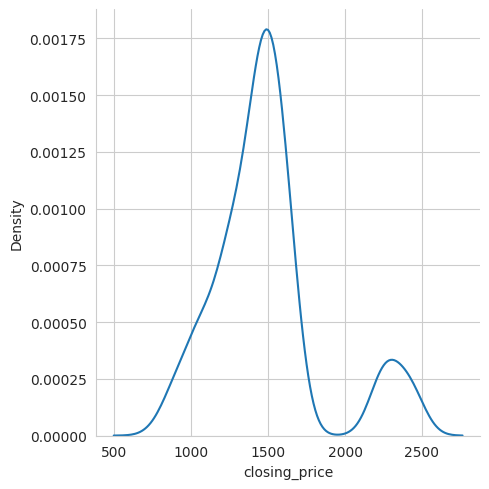

In [65]:
figure=plt.figure(figsize=(9,9))
sns.displot(HDFC,x='closing_price',kind='kde')

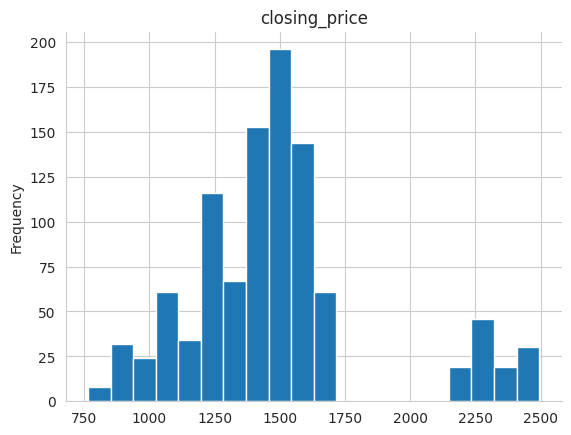

In [70]:
hdfc['closing_price'].plot(kind='hist',bins=20,title='closing_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [48]:

#loading the icici bank dataset

In [49]:
data_2=pd.read_csv('ICICI.bank.csv')
data_2

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,28-April-2023,917.6,920.00,910.40,917.70,914.955134,217558,7539,199055809.0,100116,46.02,9.60,0.10
1,27-April-2023,912.8,919.75,909.80,918.50,915.612108,116303,4662,106488435.0,41849,35.98,9.95,5.70
2,26-April-2023,908.4,916.35,906.15,914.85,911.710529,127377,4248,116130952.0,52324,41.08,10.20,6.45
3,25-April-2023,907.0,915.90,903.30,913.10,910.239809,236334,6278,215120615.0,101310,42.87,12.60,6.10
4,24-April-2023,905.0,906.75,895.00,904.65,901.427278,419949,10353,378553484.0,131592,31.34,11.75,-0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5-April-2019,391.9,392.95,385.60,390.50,388.966563,307924,3429,119772140.0,62038,20.15,7.35,-1.40
1006,4-April-2019,393.3,395.50,387.35,388.50,391.111426,566566,5273,221590436.0,165669,29.24,8.15,-4.80
1007,3-April-2019,398.0,402.85,390.90,392.40,396.437049,524888,5231,208085050.0,189170,36.04,11.95,-5.60
1008,2-April-2019,399.0,399.85,393.50,397.45,396.191453,378663,4885,150023044.0,86742,22.91,6.35,-1.55


In [50]:
data_2=data_2[['Date','Close Price']]
data_2


,Date,Close Price
0,28-April-2023,917.70
1,27-April-2023,918.50
2,26-April-2023,914.85
3,25-April-2023,913.10
4,24-April-2023,904.65
...,...,...
1005,5-April-2019,390.50
1006,4-April-2019,388.50
1007,3-April-2019,392.40
1008,2-April-2019,397.45


In [55]:
icici=data_2.rename(columns={'Close Price':'closing_price'})
icici

,Date,closing_price
0,28-April-2023,917.70
1,27-April-2023,918.50
2,26-April-2023,914.85
3,25-April-2023,913.10
4,24-April-2023,904.65
...,...,...
1005,5-April-2019,390.50
1006,4-April-2019,388.50
1007,3-April-2019,392.40
1008,2-April-2019,397.45


In [57]:
ICICI=icici.set_index(pd.DatetimeIndex(icici['Date']))
ICICI

,Date,closing_price
Date,,
2023-04-28,28-April-2023,917.70
2023-04-27,27-April-2023,918.50
2023-04-26,26-April-2023,914.85
2023-04-25,25-April-2023,913.10
2023-04-24,24-April-2023,904.65
...,...,...
2019-04-05,5-April-2019,390.50
2019-04-04,4-April-2019,388.50
2019-04-03,3-April-2019,392.40


Text(0, 0.5, 'Closing_price')

<Figure size 800x500 with 0 Axes>

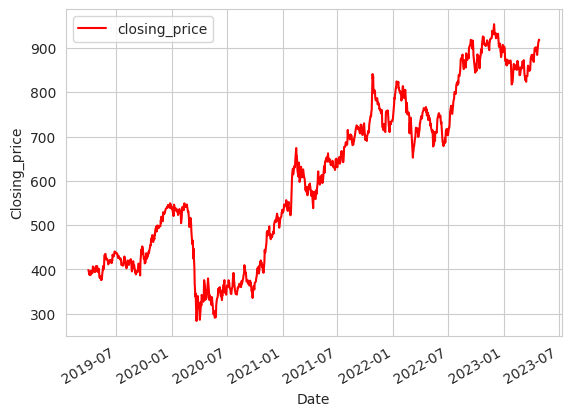

In [58]:
sns.set_style(style='whitegrid')
figure=plt.figure(figsize=(8,5))
ICICI.plot(kind='line',color='red')
plt.ylabel('Closing_price')

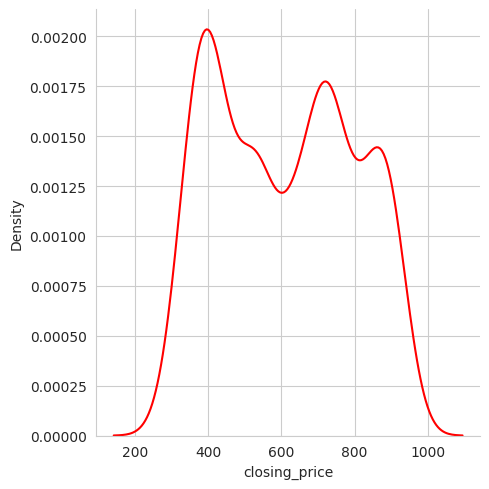

In [67]:
sns.displot(ICICI,x='closing_price',kind="kde",color='red')

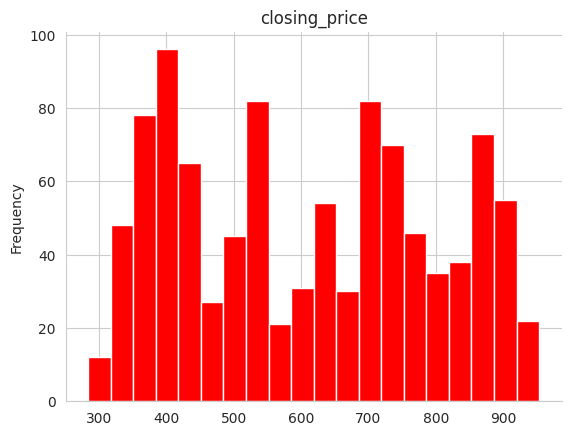

In [72]:


from matplotlib import pyplot as plt
icici['closing_price'].plot(kind='hist', bins=20, title='closing_price',color='red')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [73]:
# calculating gains

In [75]:
HDFC['gains']=HDFC['closing_price'].pct_change(periods=1)
HDFC

,Date,closing_price,gains
Date,,,
2023-04-28,28-April-2023,1688.05,NaN
2023-04-27,27-April-2023,1681.05,-0.004147
2023-04-26,26-April-2023,1672.20,-0.005265
2023-04-25,25-April-2023,1663.60,-0.005143
2023-04-24,24-April-2023,1688.45,0.014937
...,...,...,...
2019-04-05,5-April-2019,2301.75,0.005614
2019-04-04,4-April-2019,2284.30,-0.007581
2019-04-03,3-April-2019,2295.25,0.004794


In [82]:
HDFC.dropna()

,Date,closing_price,gains
Date,,,
2023-04-27,27-April-2023,1681.05,-0.004147
2023-04-26,26-April-2023,1672.20,-0.005265
2023-04-25,25-April-2023,1663.60,-0.005143
2023-04-24,24-April-2023,1688.45,0.014937
2023-04-21,21-April-2023,1673.80,-0.008677
...,...,...,...
2019-04-05,5-April-2019,2301.75,0.005614
2019-04-04,4-April-2019,2284.30,-0.007581
2019-04-03,3-April-2019,2295.25,0.004794


<Axes: title={'center': 'CLOSING_PRIE'}, xlabel='Date'>

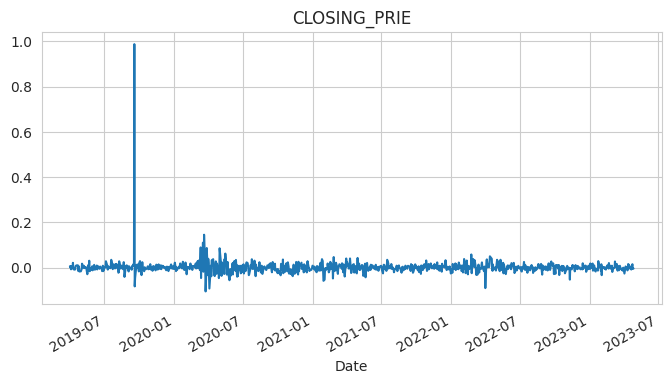

In [83]:
HDFC['gains'].plot(kind='line',figsize=(8,4),title='CLOSING_PRIE')


<ipython-input-93-bdda56dbe24a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(HDFC['gains'],bins=30,color='blue')


Text(0.5, 1.0, 'HDFC')

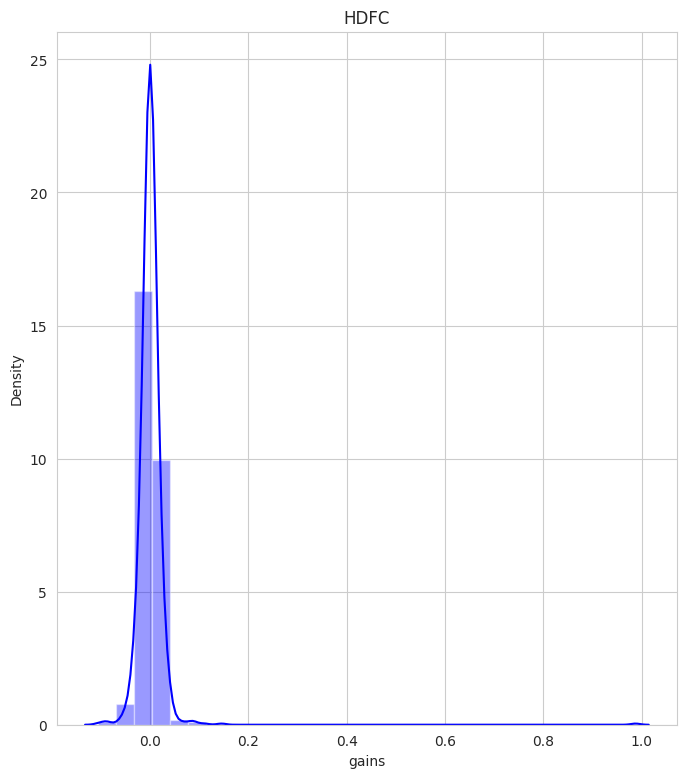

In [93]:
figure=plt.figure(figsize=(8,9))
sns.distplot(HDFC['gains'],bins=30,color='blue')
plt.title('HDFC')

In [88]:
HDFC.var()

<ipython-input-88-a603fd6dac8d>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  HDFC.var()


closing_price    128470.258822
gains                 0.001298
dtype: float64

In [84]:
ICICI['gains']=ICICI['closing_price'].pct_change(periods=1)
ICICI



,Date,closing_price,gains
Date,,,
2023-04-28,28-April-2023,917.70,NaN
2023-04-27,27-April-2023,918.50,0.000872
2023-04-26,26-April-2023,914.85,-0.003974
2023-04-25,25-April-2023,913.10,-0.001913
2023-04-24,24-April-2023,904.65,-0.009254
...,...,...,...
2019-04-05,5-April-2019,390.50,0.008653
2019-04-04,4-April-2019,388.50,-0.005122
2019-04-03,3-April-2019,392.40,0.010039


<Axes: title={'center': 'CLOSING_PRIE'}, xlabel='Date'>

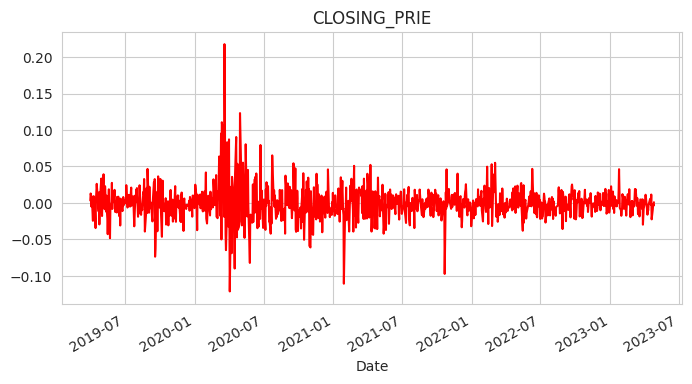

In [86]:
ICICI['gains'].plot(kind='line',figsize=(8,4),title='CLOSING_PRIE',color='red')

<ipython-input-95-171e8d923cc5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ICICI['gains'],bins=30,color='red')


Text(0.5, 1.0, 'ICICI')

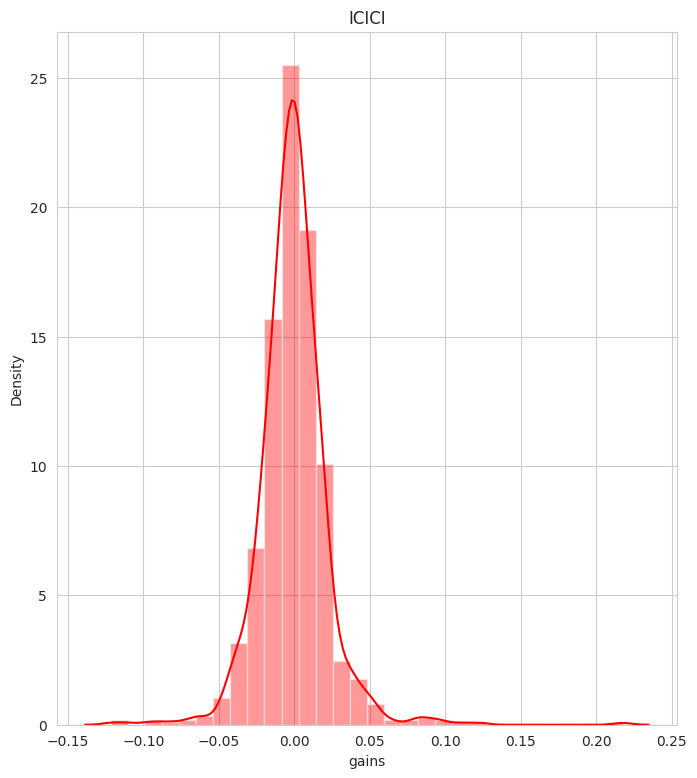

In [95]:
figure=plt.figure(figsize=(8,9))
sns.distplot(ICICI['gains'],bins=30,color='red')
plt.title('ICICI')

In [87]:
ICICI.var()

<ipython-input-87-7ca673c520ff>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ICICI.var()


closing_price    35150.942991
gains                0.000515
dtype: float64

In [107]:
HDFC.var()

<ipython-input-107-a603fd6dac8d>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  HDFC.var()


closing_price    128470.258822
gains                 0.001298
dtype: float64

In [108]:
ICICI.std()

<ipython-input-108-554f382775c0>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ICICI.std()


closing_price    187.485847
gains              0.022696
dtype: float64

In [109]:
HDFC.std()


<ipython-input-109-5ca2ff9dbf7c>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  HDFC.std()


closing_price    358.427481
gains              0.036031
dtype: float64

In [96]:
# interval estimates

In [97]:
from scipy import stats

In [98]:
# 90%
stats.norm.interval(0.90,
HDFC['gains'].mean(),
HDFC['gains'].std())

(-0.05849145923987892, 0.0600392061030828)

In [101]:
#95%
stats.norm.interval(0.95,
HDFC['gains'].mean(),
HDFC['gains'].std())

(-0.06984512613443934, 0.07139287299764323)

In [102]:
#99%
stats.norm.interval(0.99,
HDFC['gains'].mean(),
HDFC['gains'].std())

(-0.09203522403362693, 0.09358297089683082)

In [104]:
#90%
stats.norm.interval(0.90,
ICICI['gains'].mean(),
ICICI['gains'].std())

(-0.03790398952013997, 0.036760786170759376)

In [105]:
#95%
stats.norm.interval(0.95,
ICICI['gains'].mean(),
ICICI['gains'].std())

(-0.0450558855252684, 0.04391268217588783)

In [106]:
#99%
stats.norm.interval(0.99,
ICICI['gains'].mean(),
ICICI['gains'].std())

(-0.05903386057002182, 0.057890657220641246)

**INFERENCE:**

> From the above graphiical techniques and functions we ca draw the following inference:

> Comparitively , HDFC is safer to invest as it has low Variance and standard deviation  compared to ICICI

> comparing the closing price , HDFC has higher closing price as per 2023(above 1500) while ICICI closing price (above 900)
(as per the line plots created above )


> comparing the gain , HDFC has stable return of gains compared to ICICI (as per variance ans standard deviation)